#**Machine Learning Project 2**

**Dr. Han**
**DSC 4310**
**Adam Abid, Seth Kacura and Devin Duran**

In [1]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


In [3]:
credit_risk_small_data      = pd.read_csv('/content/drive/My Drive/Machine Learning Final Project/credit_risk_small_data.csv')
credit_risk_simulate        = pd.read_csv('/content/drive/My Drive/Machine Learning Final Project/credit_data_simulate.csv')
cybersecurity_data          = pd.read_csv('/content/drive/My Drive/Machine Learning Final Project/cybersecurity_data.csv')

In [4]:
credit_risk_small_data.head()

,Delinquency,Revolving Credit Percentage,Capital Reserves,Num Late 60,Debt Ratio,Monthly Income,Num Credit Lines,Num Late Past 90,Num Real Estate,Num Late 90,Num Employees
0,0,0.390912,53,0,0.241776,10000,9,0,1,0,2
1,0,0.037574,64,0,0.323588,10500,11,0,2,0,0
2,0,0.002058,59,0,0.458093,16500,12,0,2,0,2
3,0,1.023988,36,0,0.203108,2766,4,0,0,0,3
4,0,0.966603,61,1,0.350550,3000,4,0,1,0,0


In [5]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import f1_score, balanced_accuracy_score, roc_auc_score

In [6]:
iris = datasets.load_iris()

In [7]:
# Set data and target
X = iris.data
y = iris.target

In [8]:
# Split the dataset into 70% training and 30% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
# Normalize the data
# We use MaxAbsScaler since it works best for well-structured data like the iris dataset
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()

# Fit and transform the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

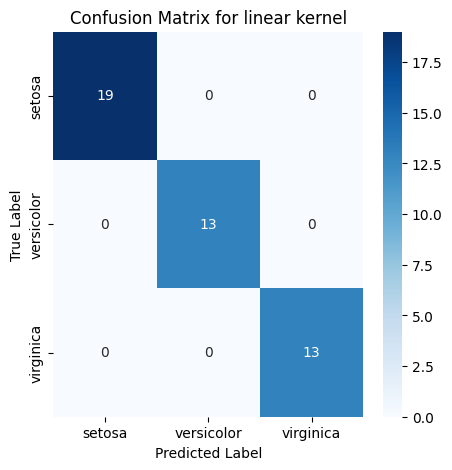

Metrics for linear kernel:

F1-micro under linear kernel: 1.0
F1-macro under linear kernel: linear 1.0
Balanced Accuracy under linear kernel: 1.0
ROC AUC Score under linear kernel: 1.0
d-index under linear kernel: 2.0


In [ ]:
# Train an SVM classifier
# We use the four main kernels; Linear, RBF/Gaussian, Polynomial, and Sigmoid
# We create a for loop that runs the SVM, takes the metrics, and prints a confusion matrix for each kernel
kernels = ['linear', 'rbf', 'poly', 'sigmoid']

for kernel in kernels:
  svm_classifier = svm.SVC(kernel=kernel, random_state=42)
  svm_classifier.fit(X_train, y_train)

  # Make predictions on the test set
  y_pred = svm_classifier.predict(X_test)

  # Binarize the labels
  from sklearn.preprocessing import label_binarize
  import numpy as np
  y_test_bin = label_binarize(y_test, classes=np.unique(y))
  n_classes = y_test_bin.shape[1]

  # Calculate classification measures

  # F1-micro: calculates the F1 score by considering global true positives, false negatives, and false positives; gives equal weight to each sample and each class
  f1_micro = f1_score(y_test, y_pred, average='micro')

  # F1-macro: calculates the F1 score independently for each class and then takes the unweighted average of those scores; gives equal weight to each class
  f1_macro = f1_score(y_test, y_pred, average='macro')

  # Balanced Accuracy: calculates accuracy of a classifier, taking class imbalance into account; arithmetic mean of sensitivity and specificity
  balanced_acc = balanced_accuracy_score(y_test, y_pred)

  # ROC AUC Score: measures area under the roc curve, which plots the true positive rate against the false positive rate
  y_pred_bin = svm_classifier.decision_function(X_test)
  roc_auc = roc_auc_score(y_test_bin, y_pred_bin, average='macro')

  # Calculate the confusion matrix
  from sklearn.metrics import confusion_matrix
  conf_matrix = confusion_matrix(y_test, y_pred)

  # The diagnostic index is equal to log(1 + accuracy) + log(1 + (sensitivity+specifity)/2)
  # To calculate it we need to find the accuracy, sensitvity and specificity of our model

  # Calculate accuracy
  accuracy = np.sum(np.diag(conf_matrix)) / np.sum(conf_matrix)

  # Calculate sensitivity (true positive rate)
  sensitivity = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)

  # Calculate specificity (true negative rate)
  specificity = []

  for i in range(len(iris.target_names)):
    # Calculate true negatives and false positives
    true_negatives = np.sum(np.delete(np.delete(conf_matrix, i, axis=0), i, axis=1))
    false_positives = np.sum(conf_matrix[:, i]) - conf_matrix[i, i]
    specific = true_negatives / (true_negatives + false_positives)
    specificity.append(specific)

  # Calculate diagnostic index
  d_index = (np.log2(1 + accuracy) + np.log2(1 + (sensitivity+specificity)/2))

  # Visualize the confusion matrix
  # This will help us see where any classification errors take place
  import seaborn as sns
  import matplotlib.pyplot as plt
  # set figure size
  plt.rcParams['figure.figsize'] = (5, 5)
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['setosa', 'versicolor', 'virginica'], yticklabels=['setosa', 'versicolor', 'virginica'])
  plt.title(f'Confusion Matrix for {kernel} kernel')
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()

  # Print the results
  print(f"Metrics for {kernel} kernel:\n")
  print(f"F1-micro under {kernel} kernel:", f1_micro)
  print(f"F1-macro under {kernel} kernel:", kernel, f1_macro)
  print(f"Balanced Accuracy under {kernel} kernel:", balanced_acc)
  print(f"ROC AUC Score under {kernel} kernel:", roc_auc)
  print(f"d-index under {kernel} kernel:", d_index[1])

In [ ]:
# Results for Linear Kernel
linear_results = {
    'F1-micro': 1.0,
    'F1-macro': 1.0,
    'Balanced accuracy': 1.0,
    'ROC AUC Score': 1.0,
    'D-index': 2.0
}

# Results for RBF Kernel
rbf_results = {
    'F1-micro': 1.0,
    'F1-macro': 1.0,
    'Balanced accuracy': 1.0,
    'ROC AUC Score': 1.0,
    'D-index': 2.0
}

# Results for Polynomial Kernel
poly_results = {
    'F1-micro': 0.9777777777777777,
    'F1-macro': 0.974320987654321,
    'Balanced accuracy': 0.9743589743589745,
    'ROC AUC Score': 0.983974358974359,
    'D-index': 1.9558659584671267
}

# Results for Sigmoid Kernel
sigmoid_results = {
    'F1-micro': 0.15555555555555556,
    'F1-macro': 0.1414141414141414,
    'Balanced accuracy': 0.1794871794871795,
    'ROC AUC Score': 0.31030701754385964,
    'D-index': 0.8557682722384595
}

# Metric names and corresponding values for both models
metrics = list(linear_results.keys())
linear_values = list(linear_results.values())
rbf_values = list(rbf_results.values())
poly_values = list(poly_results.values())
sigmoid_values = list(sigmoid_results.values())

# Create bar plot
x = np.arange(len(metrics))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - 3*width/2, linear_values, width, label='Linear')
rects2 = ax.bar(x - width/2, rbf_values, width, label='RBF')
rects3 = ax.bar(x + width/2, poly_values, width, label='Polynomial')
rects4 = ax.bar(x + 3*width/2, sigmoid_values, width, label='Sigmoid')

# Add labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Each SVM Kernel for the iris data')
ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=45, ha='right')
ax.legend()

# Show plot
plt.tight_layout()
plt.show()

**Using all four different kernels to generate an SVM to predict the variety, we got varied results**

**Using linear and RBF kernels gave us perfect metrics across the board. (for reference, a perfect d-index is 2)**

**Our SVM for the polynomial has only one incorrect prediction, with one of the versicolor observations being predicted to be virginica. Thus the metrics here are all very high as well**

**However, using the sigmoid kernel is only able to correctly predict the versicolor variety 7 times, and has most metrics at around 0.14 to 0.18 and a ROC AUC score of about 0.31. Here, the d-index is about 0.86. It is very rare for the d-index to be less than one and this implies that the classification is worse than "chance level" classification under the sigmoid kernel.**

**The linear kernel having perfect metrics illustrates and emphasizes that the iris dataset is very well-separated and linear, potentially linearly separable.**

**The rbf kernel also returning perfect scores further shows that the iris data is well-separated and can be easily classified or predicted by our SVM model**

**Typically, for potentially linearly separable data, the polynomial kernel is expected to return lower metrics than that of the linear kernel. However, here there isn't too much of a decrease. However, the sigmoid kernel drops the metrics quite a bit as it introduces much greater non-linearity than that of the polynomial kernel that is not necessary for the linear structure of the iris data.**

**Overall, aside from the sigmoid kernel, our SVM worked very well in classifying the variety of the iris data for each of the kernels, showing here that they are pretty much interchangeable despite the data appearing to be linear.**

## **Part B: Bagging SVM**


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
import numpy as np

# Function to implement Bagging SVM
def bagging_svm(X_train, y_train, X_test):
    X_train.reset_index(drop=True, inplace=True)
    y_train.reset_index(drop=True, inplace=True)
    # Initialize list to store predictions from individual SVMs
    predictions = []

    # Train and predict using three SVMs
    for i in range(3):
        # Randomly select half of the index values
        indices = np.arange(len(X_train))
        random_indices = np.random.choice(indices, size=len(X_train)//2, replace=False)
        X_train_subset = X_train.iloc[random_indices]
        y_train_subset = y_train.iloc[random_indices]

        svm_model = svm.SVC(kernel='rbf')
        svm_model.fit(X_train_subset, y_train_subset)
        svm_predictions = svm_model.predict(X_test)

        predictions.append(svm_predictions)


    all_predictions = np.array(predictions)
    from scipy.stats import mode
    mode_result = mode(all_predictions, axis=0, keepdims = True)
    final_pred = mode_result.mode[0]
    return final_pred

In [ ]:
#function to return svm
def SVM(X,y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Train SVM on the entire training set and predict
  svm_model = svm.SVC(kernel='rbf',tol=.0001,gamma = .5, C= 1)
  svm_model.fit(X_train, y_train)
  svm_predictions = svm_model.predict(X_test)

  #run the bagging svm
  bagging_predictions = bagging_svm(X_train,y_train,X_test)
  # Compare the performance of SVM and Bagging SVM
  svm_accuracy = accuracy_score(y_test, svm_predictions)
  bagging_accuracy = accuracy_score(y_test, bagging_predictions)

  return svm_accuracy,bagging_accuracy,y_test,svm_predictions,bagging_predictions

In [ ]:

#function for calculating acccuracy and other metrics
from sklearn.metrics import classification_report
def stats(y_true,y_pred):
  cm = confusion_matrix(y_test, y_pred)

  # Calculate sensitivity and specificity
  tn, fp, fn, tp = cm.ravel()
  sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
  specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

  # Calculate d-index
  accuracies = [svm_accuracy, bagging_accuracy]
  for accuracy in accuracies:
    d_index = (np.log2(1 + accuracy)) + (np.log2(1 + (sensitivity+specificity)/2))

  # Calculate f1-micro and f1-macro
  report = classification_report(y_true, y_pred, output_dict=True,zero_division=0)
  f1_micro = report['accuracy']
  f1_macro = report['macro avg']['f1-score']

  # Calculate balanced accuracy
  balanced_accuracy = (sensitivity + specificity) / 2


  return sensitivity,specificity,d_index,f1_micro,f1_macro,balanced_accuracy

#### **Bagging SVM for credit_risk_simulate**

In [ ]:
#pre proccess dataset and remove missing values
credit_risk_simulate = credit_risk_simulate.dropna()
credit_risk_simulate.head()

In [ ]:
# seperate true labels and data into two datasets
encoder = LabelEncoder()
credit_risk_simulate['label']    = encoder.fit_transform(credit_risk_simulate['Credit status'])
credit_risk_simulate_predict     = credit_risk_simulate.drop(columns = ['label','Credit status'])
credit_risk_simulate_TrueLabels  = credit_risk_simulate.label
credit_risk_simulate_predict.head()

In [ ]:
X = credit_risk_simulate_predict
y = credit_risk_simulate_TrueLabels

In [ ]:
svm_accuracy,bagging_accuracy,y_test,svm_predictions,bagging_predictions = SVM(X,y)

print("Results for SVM model")
print("Accuracy of SVM:", svm_accuracy)

#for svm
sensitivity,specificity,d_index,f1_micro,f1_macro,balanced_accuracy = stats(y_test,svm_predictions)
# Print the results

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("D-index:", d_index)
print("F1-micro:", f1_micro)
print("F1-macro:", f1_macro)
print("Balanced accuracy:", balanced_accuracy)
print('\n')


print("Results for BaggingSVM model")
print("Accuracy of Bagging SVM:", bagging_accuracy)

sensitivity,specificity,d_index,f1_micro,f1_macro,balanced_accuracy = stats(y_test,bagging_predictions)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("D-index:", d_index)
print("F1-micro:", f1_micro)
print("F1-macro:", f1_macro)
print("Balanced accuracy:", balanced_accuracy)
print('\n')

In [ ]:
# Results for SVM model
svm_results = {
    'Accuracy': 1.0,
    'Sensitivity': 1.0,
    'Specificity': 1.0,
    'D-index': 2.0,
    'F1-micro': 1.0,
    'F1-macro': 1.0,
    'Balanced accuracy': 1.0
}

# Results for BaggingSVM model
bagging_results = {
    'Accuracy': 1.0,
    'Sensitivity': 1.0,
    'Specificity': 1.0,
    'D-index': 2.0,
    'F1-micro': 1.0,
    'F1-macro': 1.0,
    'Balanced accuracy': 1.0
}

# Metric names and corresponding values for both models
metrics = list(svm_results.keys())
svm_values = list(svm_results.values())
bagging_values = list(bagging_results.values())

# Create bar plot
x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, svm_values, width, label='SVM')
rects2 = ax.bar(x + width/2, bagging_values, width, label='Bagging SVM')

# Add labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of SVM and Bagging SVM Models for the credit risk simulate data')
ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=45, ha='right')
ax.legend()

# Show plot
plt.tight_layout()
plt.show()

#### **Bagging SVM for cybersecurity_data**

In [ ]:
cybersecurity_data = cybersecurity_data.dropna()
cybersecurity_data.head()

In [ ]:
cybersecurity_data['label']    = encoder.fit_transform(cybersecurity_data['class'])
cybersecurity_data_predict     = cybersecurity_data.drop(columns = ['label','class'])
cybersecurity_data_TrueLabels  = cybersecurity_data.label
cybersecurity_data_predict.head()

In [ ]:
X = cybersecurity_data_predict
y = cybersecurity_data_TrueLabels

svm_accuracy,bagging_accuracy,y_test,svm_predictions,bagging_predictions = SVM(X,y)

print("Results for SVM model")
print("Accuracy of SVM:", svm_accuracy)

#for svm
sensitivity,specificity,d_index,f1_micro,f1_macro,balanced_accuracy = stats(y_test,svm_predictions)
# Print the results

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("D-index:", d_index)
print("F1-micro:", f1_micro)
print("F1-macro:", f1_macro)
print("Balanced accuracy:", balanced_accuracy)
print('\n')


print("Results for BaggingSVM model")
print("Accuracy of Bagging SVM:", bagging_accuracy)

sensitivity,specificity,d_index,f1_micro,f1_macro,balanced_accuracy = stats(y_test,bagging_predictions)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("D-index:", d_index)
print("F1-micro:", f1_micro)
print("F1-macro:", f1_macro)
print("Balanced accuracy:", balanced_accuracy)
print('\n')

In [ ]:
# Results for SVM model
svm_results = {
    'Accuracy': 0.9607843137254902,
    'Sensitivity': 0.0,
    'Specificity': 1.0,
    'D-index': 1.5563933485243853,
    'F1-micro': 0.9607843137254902,
    'F1-macro': 0.49,
    'Balanced accuracy': 0.5
}

# Results for BaggingSVM model
bagging_results = {
    'Accuracy': 0.9607843137254902,
    'Sensitivity': 0.0,
    'Specificity': 1.0,
    'D-index': 1.5563933485243853,
    'F1-micro': 0.9607843137254902,
    'F1-macro': 0.49,
    'Balanced accuracy': 0.5
}

# Metric names and corresponding values for both models
metrics = list(svm_results.keys())
svm_values = list(svm_results.values())
bagging_values = list(bagging_results.values())

# Create bar plot
x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, svm_values, width, label='SVM')
rects2 = ax.bar(x + width/2, bagging_values, width, label='Bagging SVM')

# Add labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of SVM and Bagging SVM Models for cybersecurity data')
ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=45, ha='right')
ax.legend()

# Show plot
plt.ylim(0, 2)
plt.tight_layout()
plt.show()

#### **Bagging SVM for credit_risk_small_data**

In [ ]:
credit_risk_small_data = credit_risk_small_data.dropna()
credit_risk_small_data.head()

In [ ]:
credit_risk_small_data['label']    = encoder.fit_transform(credit_risk_small_data['Delinquency'])
credit_risk_small_data_predict     = credit_risk_small_data.drop(columns = ['label','Delinquency'])
credit_risk_small_data_TrueLabels  = credit_risk_small_data.label
credit_risk_small_data_predict.head()

In [ ]:
X = credit_risk_small_data_predict
y = credit_risk_small_data_TrueLabels

svm_accuracy,bagging_accuracy,y_test,svm_predictions,bagging_predictions = SVM(X,y)

print("Results for SVM model")
print("Accuracy of SVM:", svm_accuracy)

#for svm
sensitivity,specificity,d_index,f1_micro,f1_macro,balanced_accuracy = stats(y_test,svm_predictions)
# Print the results

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("D-index:", d_index)
print("F1-micro:", f1_micro)
print("F1-macro:", f1_macro)
print("Balanced accuracy:", balanced_accuracy)
print('\n')


print("Results for BaggingSVM model")
print("Accuracy of Bagging SVM:", bagging_accuracy)

sensitivity,specificity,d_index,f1_micro,f1_macro,balanced_accuracy = stats(y_test,bagging_predictions)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("D-index:", d_index)
print("F1-micro:", f1_micro)
print("F1-macro:", f1_macro)
print("Balanced accuracy:", balanced_accuracy)
print('\n')

In [ ]:
import matplotlib.pyplot as plt
svm_results = {
    'Accuracy': 0.9230769230769231,
    'Sensitivity': 0.0,
    'Specificity': 1.0,
    'D-index': 1.5283789723547887,
    'F1-micro': 0.9230769230769231,
    'F1-macro': 0.48000000000000004,
    'Balanced accuracy': 0.5
}

# Results for BaggingSVM model
bagging_results = {
    'Accuracy': 0.9230769230769231,
    'Sensitivity': 0.0,
    'Specificity': 1.0,
    'D-index': 1.5283789723547887,
    'F1-micro': 0.9230769230769231,
    'F1-macro': 0.48000000000000004,
    'Balanced accuracy': 0.5
}

metrics = list(svm_results.keys())
svm_values = list(svm_results.values())
bagging_values = list(bagging_results.values())

# Create bar plot
x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, svm_values, width, label='SVM')
rects2 = ax.bar(x + width/2, bagging_values, width, label='Bagging SVM')

# Add labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of SVM and Bagging SVM Models for Credit_risk_small_data')
ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=45, ha='right')
ax.legend()

# Show plot
plt.ylim(0, 2)
plt.tight_layout()
plt.show()